# Univariate analysis of house prices dataset
In the following notebook we're going to analyse what categorical features the original dataset contains and what are their distributions


In [1]:
# import dataset and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()
plt.rc('figure', figsize=(16, 6))


orig_data = pd.read_csv("data/train.csv", index_col="Id")

In [2]:
# copying the dataset for analysis
house_data = orig_data.copy()
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# checking missing values in each column
missing_val_count_by_column = (house_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Next set of actions is very similar to what I did in numerical features. Let's define distinction between categorical and numerical features:

In [12]:
Y = house_data["SalePrice"]
X = house_data.drop(['SalePrice'], axis=1)

categorical_features = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", 
                        "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", 
                        "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", 
                        "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                        "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", 
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 'PoolQC', 'Fence', 
                        'MiscFeature', 'SaleType', 'SaleCondition']

numerical_features = ["LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
                      "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", 
                      "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", 'Fireplaces', 
                      "GarageYrBlt", "GarageCars", "GarageArea", 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                      'ScreenPorch', 'PoolArea', "MiscVal", 'MoSold', 'YrSold']

Define helper functions for plotting relevant features:

In [13]:
def plot_numerical_feature(feature, include_non_positive=True):
    plot_column = X[feature]
    if not include_non_positive:
        plot_column = plot_column[plot_column > 0]
    
    print(f"Description of {feature}")
    print(plot_column.describe(), "\n")
    print(f"Histogram of {feature}")
    plt.figure()
    sns.histplot(data=plot_column)
    plt.show()
    print(f"Kernel density estimation plot of {feature}")
    plt.figure()
    sns.kdeplot(data=plot_column, shade=True)
    plt.show()
    print(f"Box plot of {feature}")   
    plt.figure()
    sns.boxplot(x=plot_column)
    plt.show()

# TODO: improve plot_categorical_feature to ignore missing values
def plot_categorical_feature(feature):
    print(f"Total count: {len(X[feature])}")
    print("The frequency table:")
    print(X[feature].value_counts()/len(X[feature]), "\n")
    print(f"Bar chart of {feature}")
    plt.figure()
    sns.barplot(x=sorted(np.unique(X[feature])), y=X[feature].value_counts().sort_index())
    plt.show()

Starting from the MSSubClass feature it is in fact a categorical feature which has numerical values. Let's look at its bar chart:

Total count: 1460
The frequency table:
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64 

Bar chart of MSSubClass


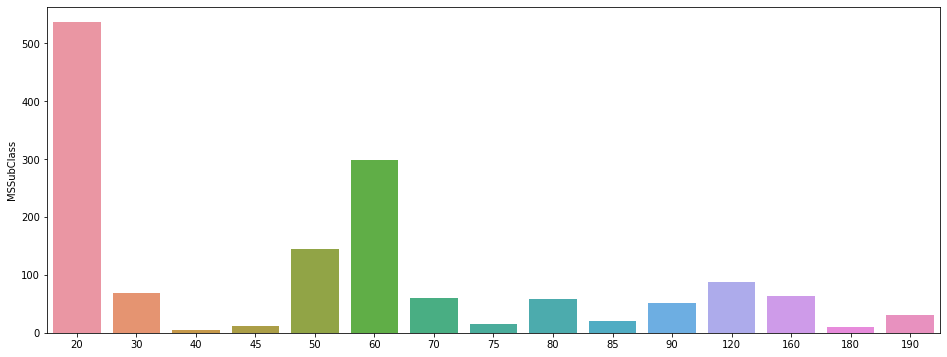

In [5]:
plot_categorical_feature("MSSubClass")

We see that types 20 and 60 take up over half of the dataset. The third one highest are 1-1/2 story finished buildings from old ages. We conclude that majority of buildings from this dataset are 1 to 2 story buildings.

Next: 'Overall Qual'. It is the rating of the overall material and finish of the house.

Total count: 1460
The frequency table:
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64 

Bar chart of OverallQual


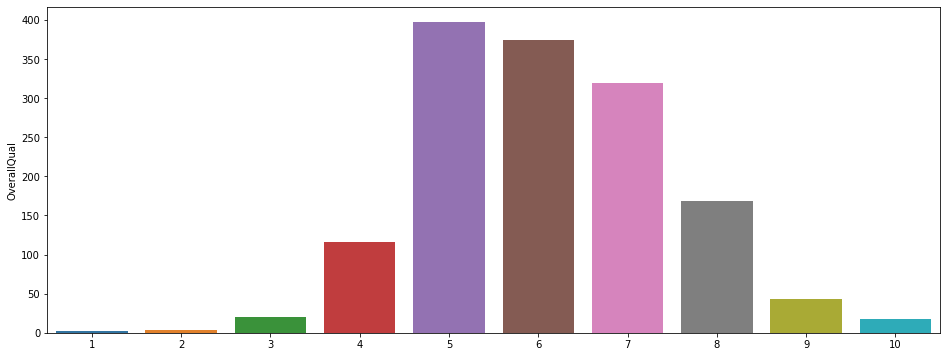

In [7]:
plot_categorical_feature("OverallQual")

Distribution is left skewed which is similar to the rating of one's intelligence (When a person is asked to judge one's intelligence in comparison to the rest of the population). Everyone thinks they are smarter than the average. It seems that some of these aspects also apply to the rating of one's house.
Above is true if the new residents were judging the condition of the house after the sale, which introduces data leakage.
If the company who sells the houses were giving the ratings, it might be the case they were "overselling" the houses as the distribution is not symmetric and centred around 5-6.

next: 'OverallCond' which is a variable rating the overall condition of the house.

Total count: 1460
The frequency table:
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64 

Bar chart of OverallCond


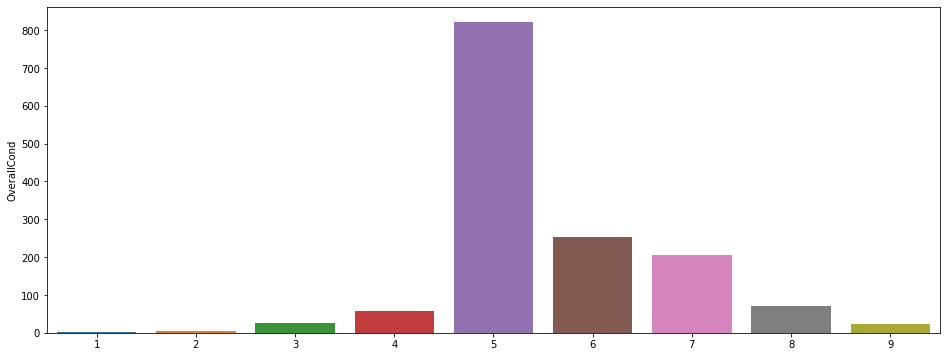

In [8]:
plot_categorical_feature("OverallCond")

Distribution is still left skewed but it is much more focused on the middle value with 56% of homes having average condition

Let's see what kinds of zoning the buildings are on ("MSZoning" feature)

Total count: 1460
The frequency table:
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64 

Bar chart of MSZoning


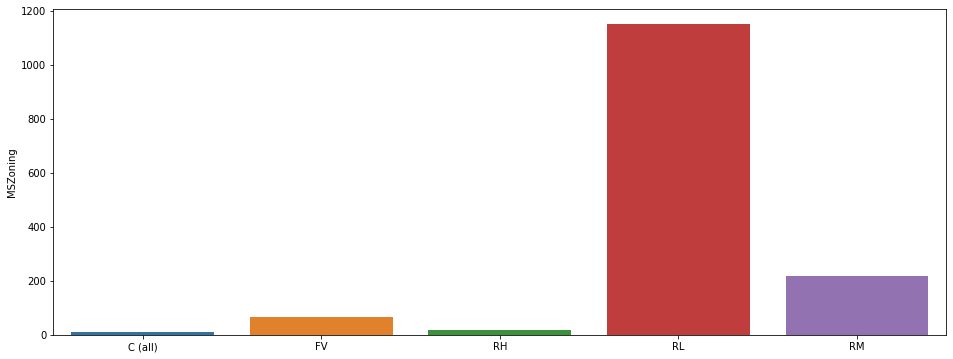

In [9]:
plot_categorical_feature("MSZoning")

What is interesting that in the training data there is no Agriculture, Industrial or Residential Low Density Park areas.

(TODO) - check if the same is true for test set

Most of the houses are Residential High Density with Medium Density being second. Both categories takes up almost 95% of the dataset.

To quicken up the process I will post graphs of all categorical features below:

Total count: 1460
The frequency table:
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64 

Bar chart of MSSubClass


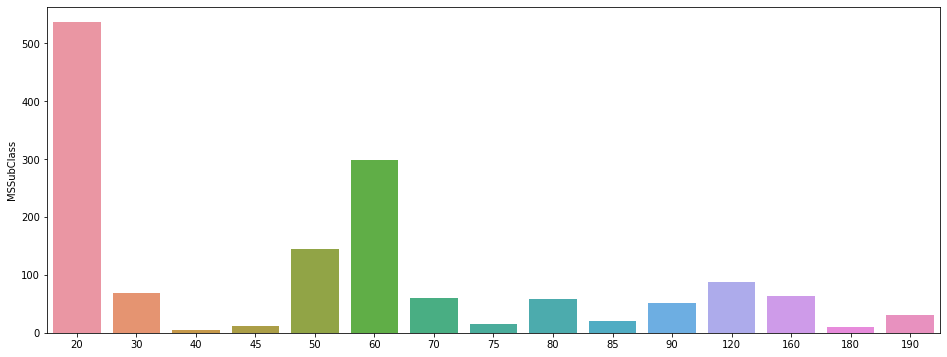

Total count: 1460
The frequency table:
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64 

Bar chart of MSZoning


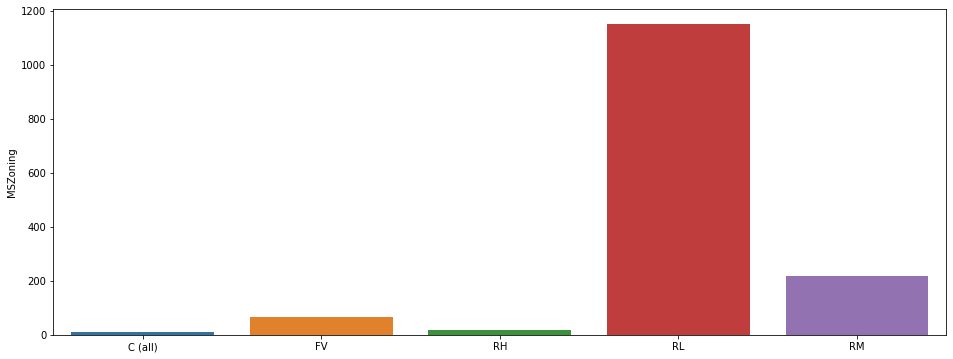

Total count: 1460
The frequency table:
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64 

Bar chart of Street


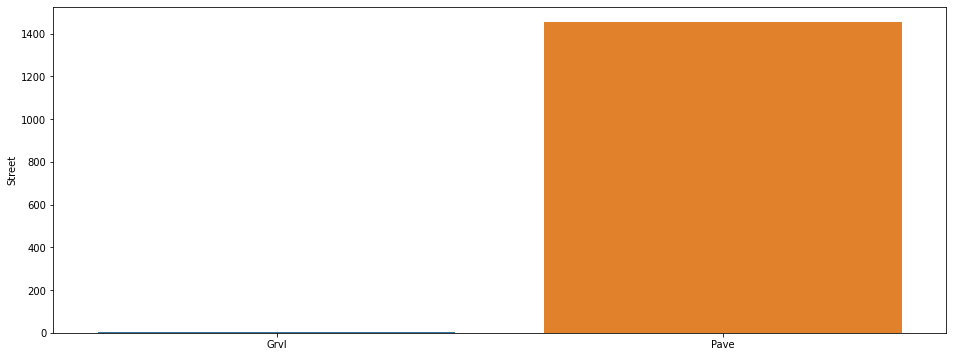

Total count: 1460
The frequency table:
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64 

Bar chart of Alley
Total count: 1460
The frequency table:
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64 

Bar chart of LotShape


<Figure size 1152x432 with 0 Axes>

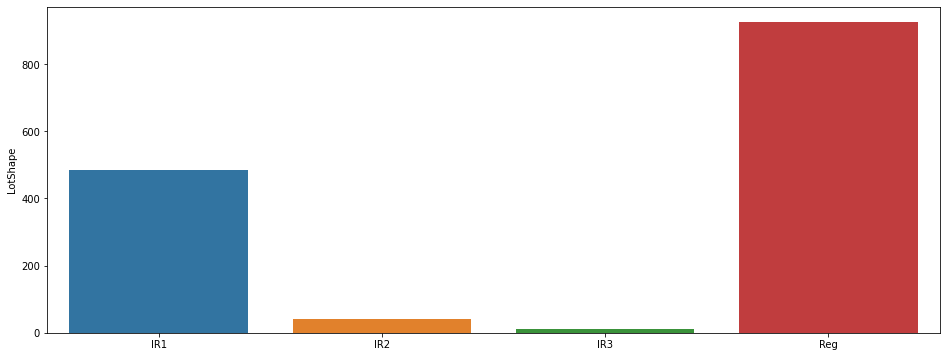

Total count: 1460
The frequency table:
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64 

Bar chart of LandContour


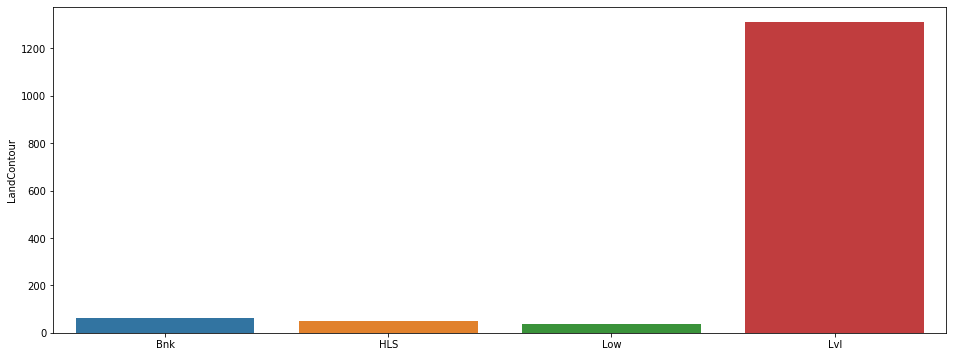

Total count: 1460
The frequency table:
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64 

Bar chart of Utilities


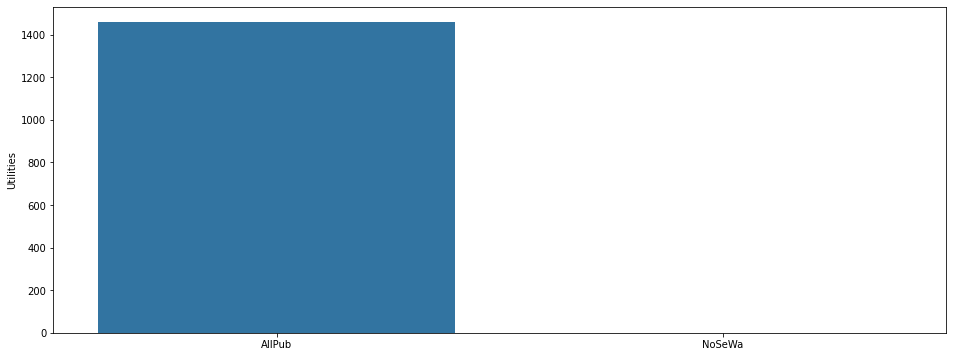

Total count: 1460
The frequency table:
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64 

Bar chart of LotConfig


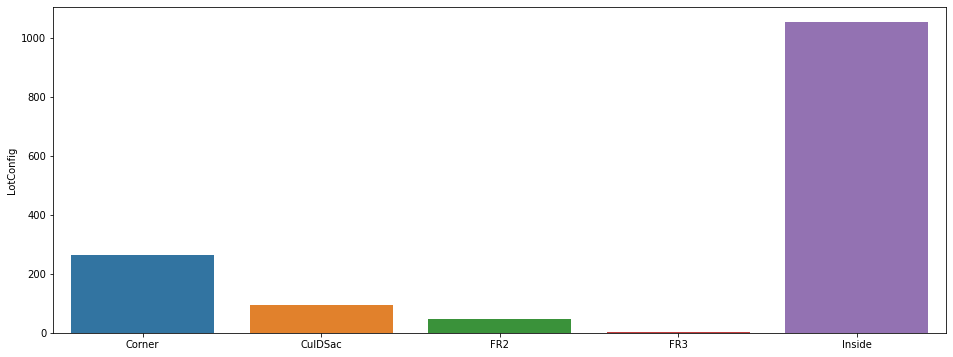

Total count: 1460
The frequency table:
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64 

Bar chart of LandSlope


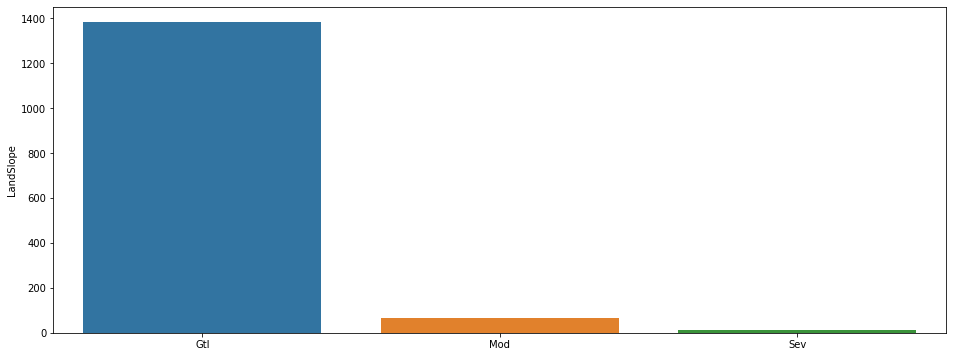

Total count: 1460
The frequency table:
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
SWISU      0.017123
StoneBr    0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64 

Bar chart of Neighborhood


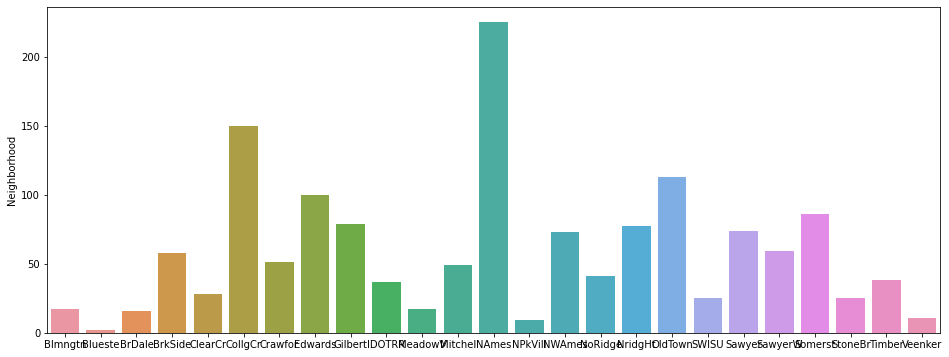

Total count: 1460
The frequency table:
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64 

Bar chart of Condition1


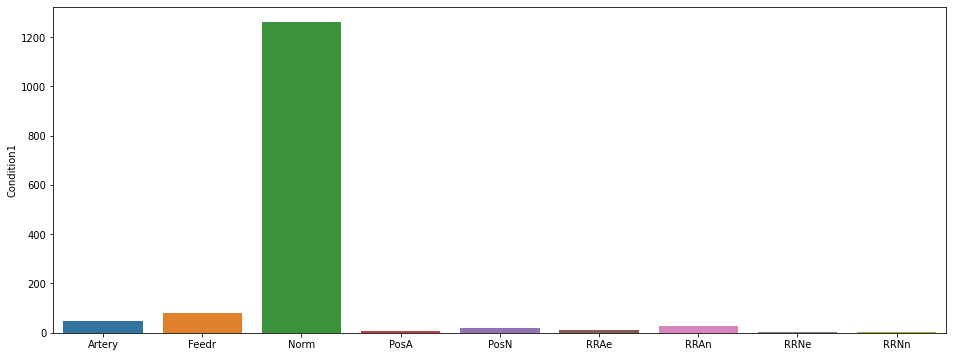

Total count: 1460
The frequency table:
Norm      0.989726
Feedr     0.004110
Artery    0.001370
PosN      0.001370
RRNn      0.001370
RRAn      0.000685
RRAe      0.000685
PosA      0.000685
Name: Condition2, dtype: float64 

Bar chart of Condition2


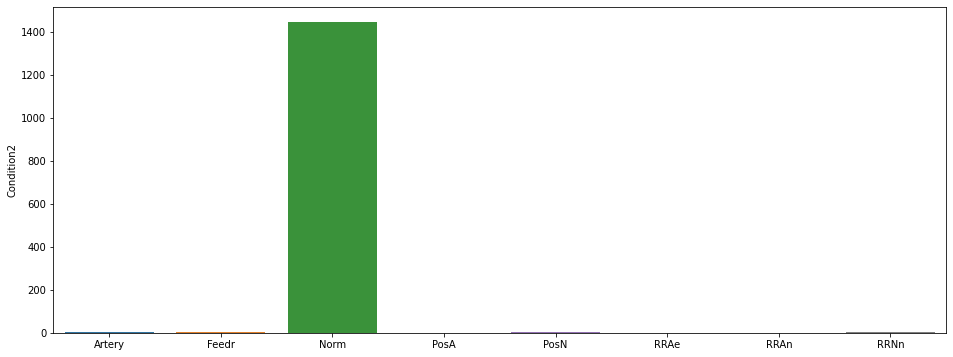

Total count: 1460
The frequency table:
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64 

Bar chart of BldgType


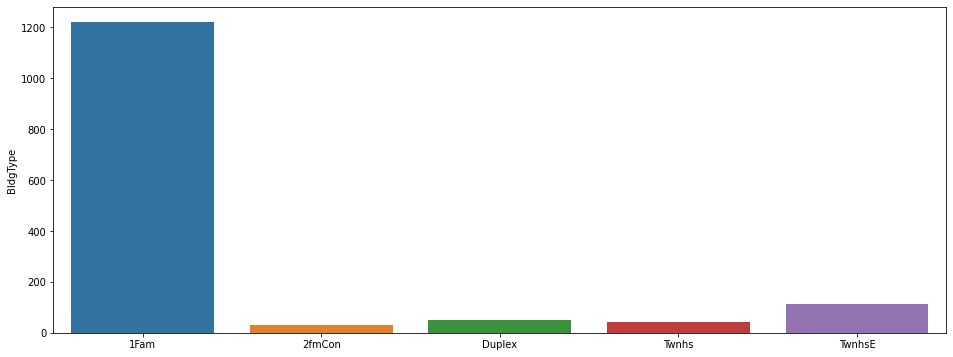

Total count: 1460
The frequency table:
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64 

Bar chart of HouseStyle


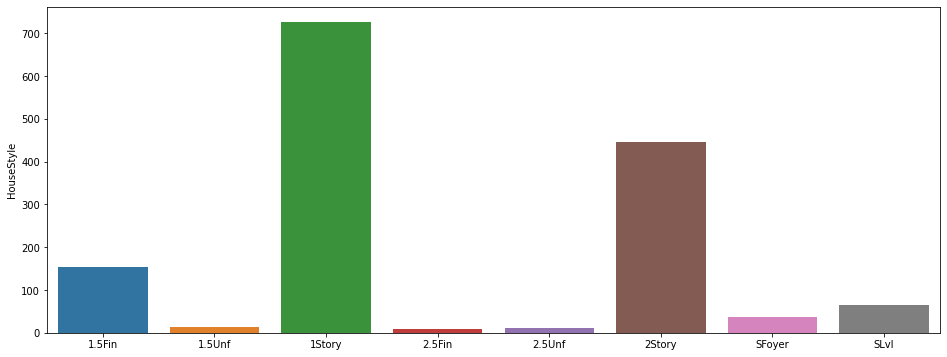

Total count: 1460
The frequency table:
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64 

Bar chart of OverallQual


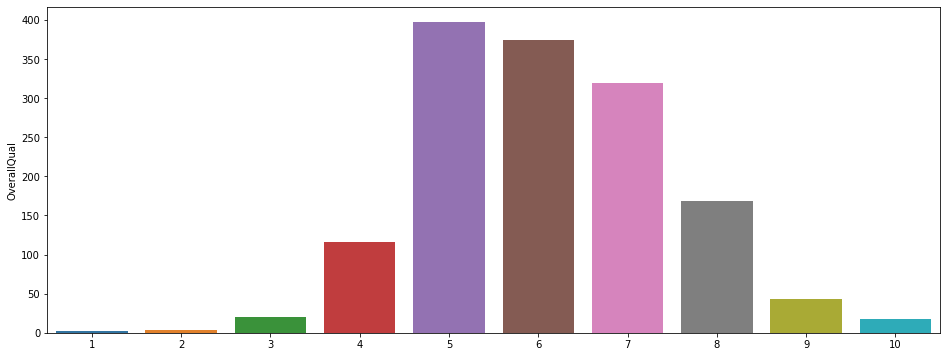

Total count: 1460
The frequency table:
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64 

Bar chart of OverallCond


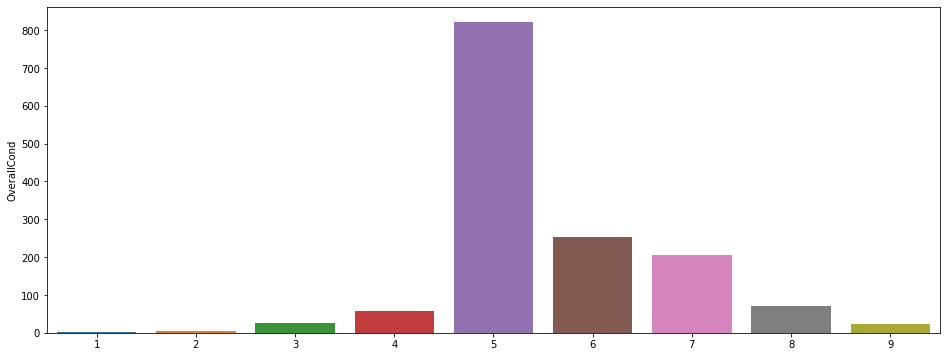

Total count: 1460
The frequency table:
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64 

Bar chart of RoofStyle


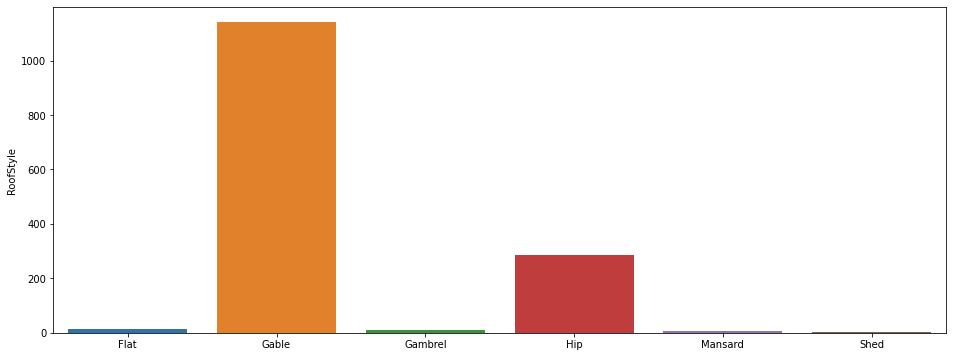

Total count: 1460
The frequency table:
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
ClyTile    0.000685
Roll       0.000685
Membran    0.000685
Metal      0.000685
Name: RoofMatl, dtype: float64 

Bar chart of RoofMatl


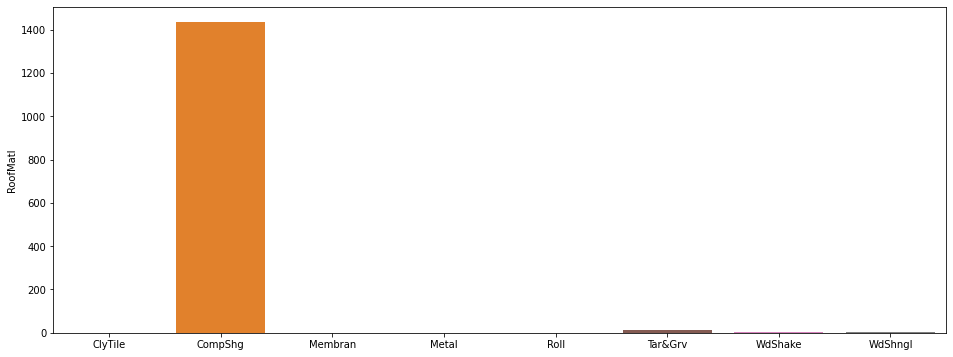

Total count: 1460
The frequency table:
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
Stone      0.001370
BrkComm    0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64 

Bar chart of Exterior1st


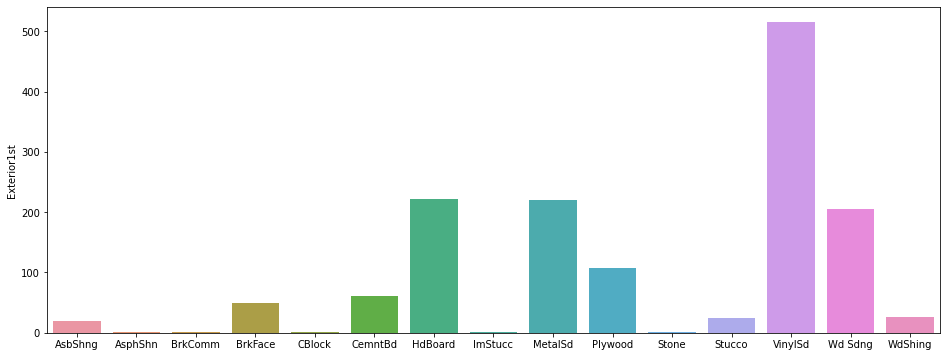

Total count: 1460
The frequency table:
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64 

Bar chart of Exterior2nd


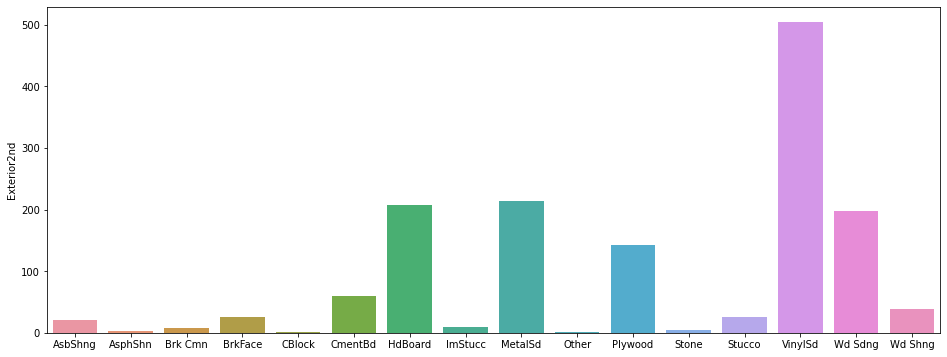

Total count: 1460
The frequency table:
None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64 

Bar chart of MasVnrType
Total count: 1460
The frequency table:
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64 

Bar chart of ExterQual


<Figure size 1152x432 with 0 Axes>

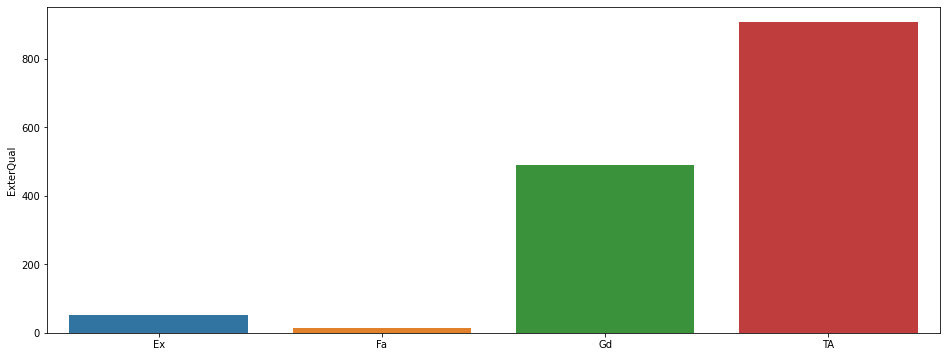

Total count: 1460
The frequency table:
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64 

Bar chart of ExterCond


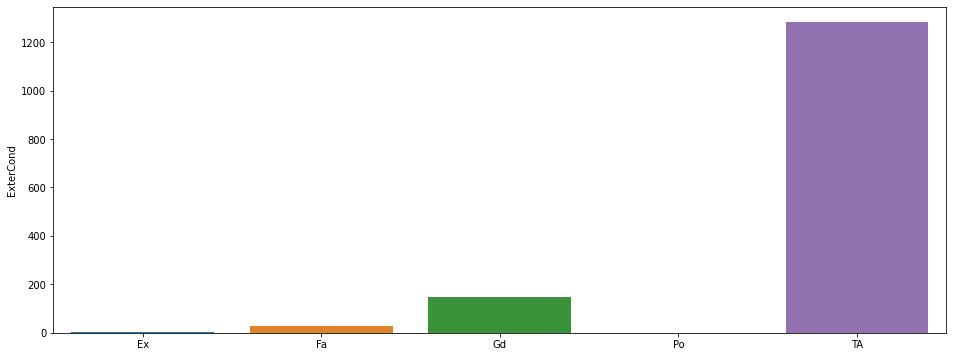

Total count: 1460
The frequency table:
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64 

Bar chart of Foundation


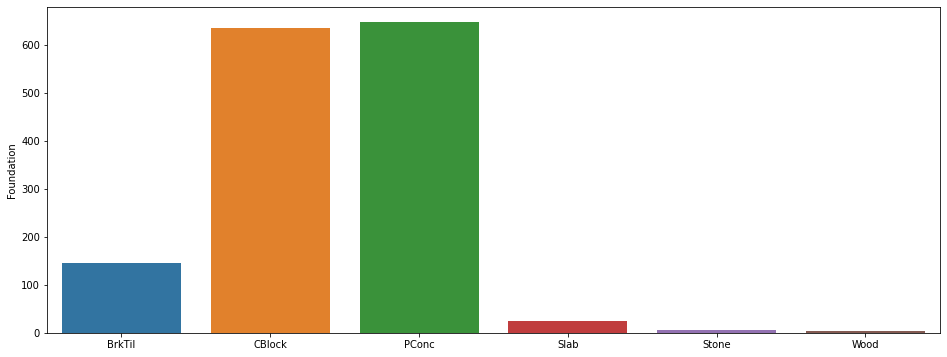

Total count: 1460
The frequency table:
TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64 

Bar chart of BsmtQual
Total count: 1460
The frequency table:
TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64 

Bar chart of BsmtCond
Total count: 1460
The frequency table:
No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64 

Bar chart of BsmtExposure
Total count: 1460
The frequency table:
Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64 

Bar chart of BsmtFinType1
Total count: 1460
The frequency table:
Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64 

Bar chart of BsmtFinType2
Total count: 1460
The frequency table:
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

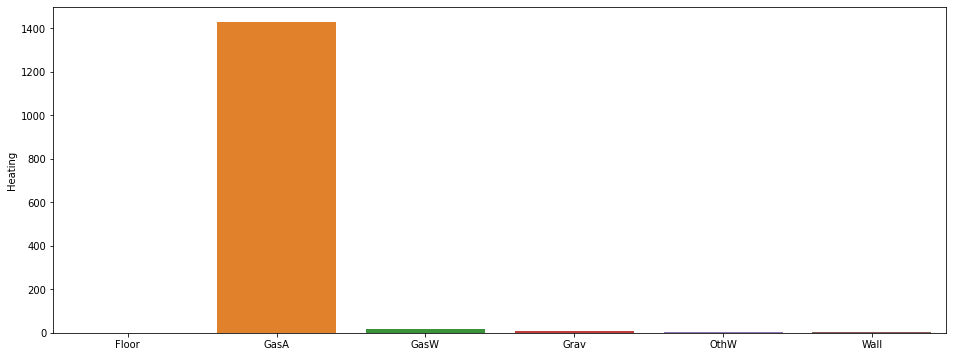

Total count: 1460
The frequency table:
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64 

Bar chart of HeatingQC


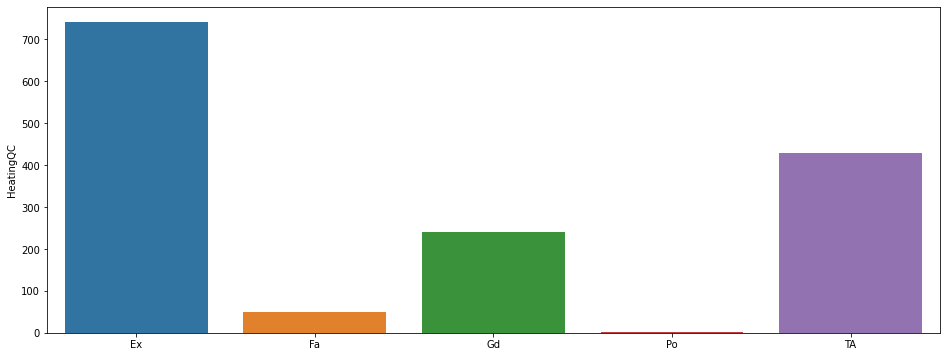

Total count: 1460
The frequency table:
Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64 

Bar chart of CentralAir


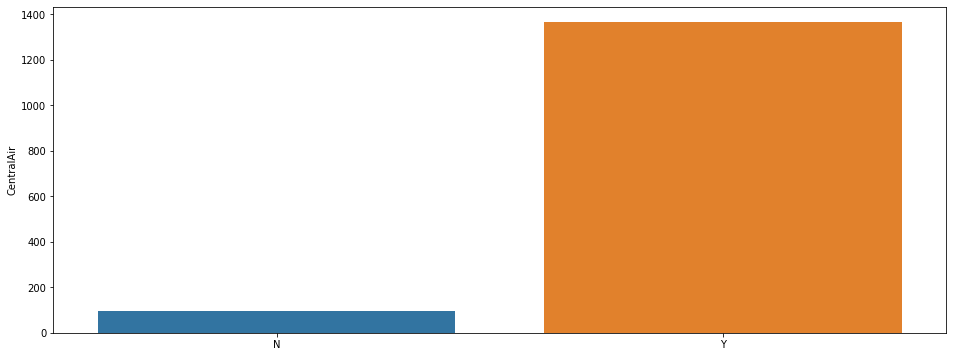

Total count: 1460
The frequency table:
SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64 

Bar chart of Electrical
Total count: 1460
The frequency table:
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64 

Bar chart of KitchenQual


<Figure size 1152x432 with 0 Axes>

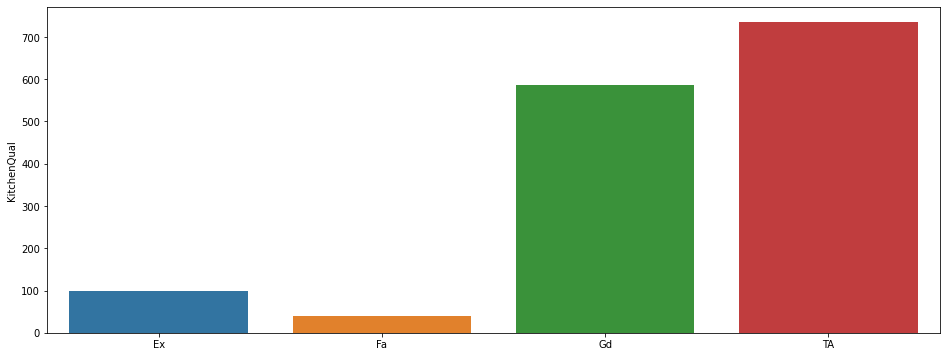

Total count: 1460
The frequency table:
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64 

Bar chart of Functional


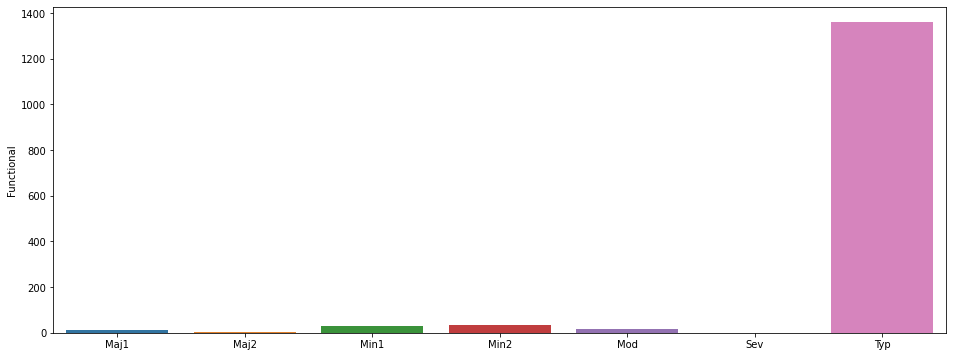

Total count: 1460
The frequency table:
Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64 

Bar chart of FireplaceQu
Total count: 1460
The frequency table:
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64 

Bar chart of GarageType
Total count: 1460
The frequency table:
Unf    0.414384
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64 

Bar chart of GarageFinish
Total count: 1460
The frequency table:
TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64 

Bar chart of GarageQual
Total count: 1460
The frequency table:
TA    0.908219
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64 

Bar chart of GarageCond
Total count: 1460
The frequency table:
Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

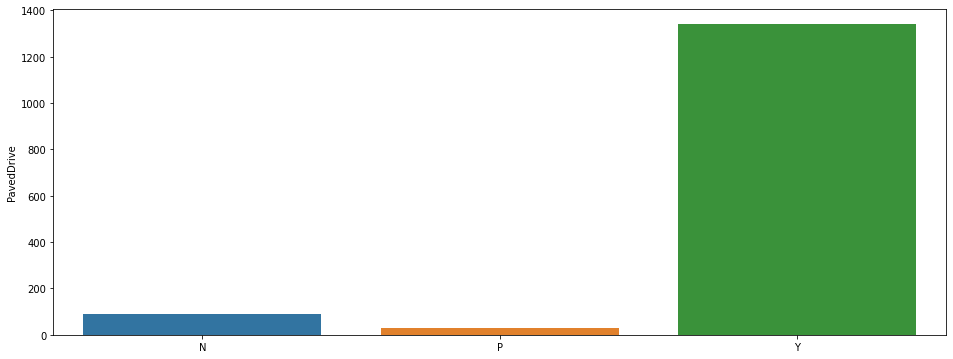

Total count: 1460
The frequency table:
Gd    0.002055
Fa    0.001370
Ex    0.001370
Name: PoolQC, dtype: float64 

Bar chart of PoolQC
Total count: 1460
The frequency table:
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64 

Bar chart of Fence
Total count: 1460
The frequency table:
Shed    0.033562
Othr    0.001370
Gar2    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64 

Bar chart of MiscFeature
Total count: 1460
The frequency table:
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64 

Bar chart of SaleType


<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

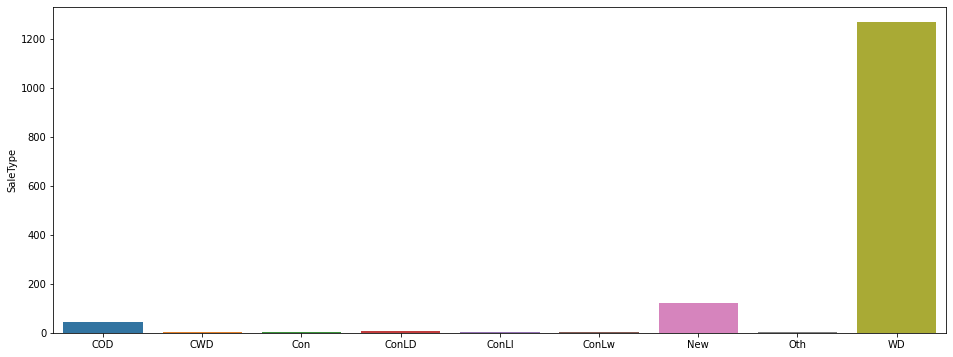

Total count: 1460
The frequency table:
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64 

Bar chart of SaleCondition


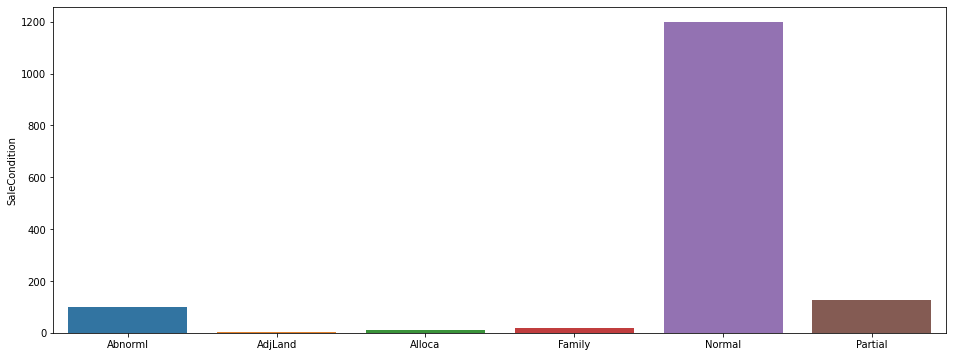

In [15]:
for feature in categorical_features:
    try:
        plot_categorical_feature(feature)
    finally:
        continue

For few of the features it was not possible to automatically plot them as a lot of them had missing values. In those cases it was still possible to calculate frequency table.  

Overview of all variables:
- "Street": Overwhelming majority contains a paved street and not a gravel one. This makes sense as most of the buildings are high to medium density. Can be treated as an ordinal variable.
- "Alley": Most of houses don't have an alley access. It's best to ignore this variable as it contains very low amount of data.
- "LotShape": most of the shapes are regular, one-third is slightly-irregular (interpretation of this statement was not provided in data description), only a handful are irregular. Can be treated as ordinal variable.
- "LandContour" - Most houses have flat level of land, only around a 10% have any differences in height on the property. Could be treated as a binary variable which contains information if a lot has drastic height changes.
- "Utilities": Almost all properties have all public utilities (Electricity, gas, water and sewage). Only one house doesn't have access to water and sewage. It's an ordinal variable but with only one observation for lack of sewage it's impossible to predict the influence of this variable. In model creation this feature would be probably omitted.
- "LotConfig": 72% of properties have an inside lot, 18% corner lot and 6% are at the dead ends (cul de sac). Rest of properties have frontages on more than one side. It's a nominal variable as there's no obvious way to order it.
- "LandSlope": Most properties have a gentle slope. It's an ordinal variable.
- "Neigbourhood": it describes location and in current form it's a nominal variable. Most houses are in the North Ames and in College Creek. It might be possible to transform the locations to their geospatial coordinates and create features from them. In its current form it has high cardinality.
- "Condition1" & "Condition2": features of the location, nominal variable. Most houses have normal proximity to all services (Above 85%). It is possible to reduce cardinality and transform this variable to binary ones relating to road or public transport access
- "BldgType" & "HouseStyle": nominal variables closely connected to "MSSubClass"
- "OverallQual" & "OverallCond": analysed above
- "RoofStyle": nominal variable. It might be interesting to relate this variable to geospatial information and the time it was built, how roofs change with distance from the center for example. (TODO: check dependence of roof type to position in town and the construction date)
- "RoofMatl" - it has one dominant value, which suggests that it might be not very impact impactful and it will be difficult to extract useful information from it, nominal variable
- "Exterior1st" & "Exterior2nd": nominal variables, it has high cardinality and it will be hard to narrow it down (Maybe use some more general categories, TODO: think about what to do with this one).
- "MasVnrType": For some reason bar chart didn't want to show up, some values in the column might be of different types.
- "ExterQual" & "ExterCond": ordinal variables. Both of them are highly centred on average value with only single cases having poor or excellent in case of "ExterCond". Distribution of "ExterQual" is slightly skewed and has more values in the good and excellent regime.
- "Foundation": Majority has Concrete or Cinder blocks foundations (87% of cases), nominal variable
- "BsmtQual": Most have typical or good quality, ordinal variable.
- "BsmtCond": ordinal variable, Majority (90%) has a typical condition
- "BsmtExposure": ordinal variable, 65% has no exposure and only 15% little exposure
- "BsmtFinType1" & "BsmtFinType2": These are clusters of very similar features, might divide them into groups of ordinal variables
- "Heating": nominal variable, absolute majority (98%) has only one type of heating. It might be interesting to see how type of furnace relates to the age of the building(TODO: check that)
- "HeatingQC": It seems that city of Ames has excellent heating service. Half of the houses have excellent heating and 45% have good and typical quality. It might be interesting to compare this finding to other cities, if it is common to find such relationship. Ordinal variable.
- "CentralAir": binary variable, most houses (93%) have central air conditioning
- "Electrical": can be treated as ordinal variable, over 90% of houses have standard circuit safety
- "KitchenQual": ordinal variable, heavily skewed towards more positive values. 90% of values have good or typical quality.
- "Functional": ordinal variable, most houses don't have any deductions
- "FireplaceQu": ordinal variable, varies considerably between houses, somewhat flattened distribution with peaks at fair and good quality.
- "GarageType": nominal variable, most have a garage attached to home, 27% have a detached garage. About 14% have no garage or a different type.
- "GarageFinish": ordinal variable. What's interesting is that most houses (40%) have unfinished interior of the garage, 29% have roughly finished and 24% have finished. One could predict that most houses would have completed garages in such car-oriented city as Ames.
- "GarageQual" & "GarageCond": very similar ordinal variables. Most garages have typical quality (90%). When constructing a model one of the features could be ignored because of their incredible similarity.
- "PavedDrive": ordinal variable, most houses (90%) have a paved driveway
- "PoolQC": ordinal variable, very few data of this variable, most houses of course don't have a pool
- "Fence": variable which contains two ordinal variables in itself. It's interesting why they're not separated. Most houses (80%) don't have a fence. In analysis Fence might be treated as ordinal variable with three stages 1. Good wood/privacy, 2. Minimum wood/privacy, 3. No Fence
- "MiscFeature": nominal variable, very few houses contain any additional features (7%), difficult to judge impact of this variable on prediction.
- "SaleType": difficult to judge if this variable introduces data leakage. It doesn't if we set the sale type upfront. But on the other hand this kind of information might occur only after the sale was confirmed. It's a nominal variable with conventional sales occuring 87% of the time. 8% of houses were sold just after construction.
- "SaleCondition": Nominal variable. Here it is also difficult to judge if we would have this information when making prediction about home price. 82% were "normal", Around 8% were partial (associated with new homes) and around 7% abnormal (trade, foreclosure or short sale).